*Cole Kumpf, Ben Spencer, Jay Puleo, Alex Guentchev*

# Problem Being Solved: Why a Chess Agent?
Chess is a great example of a strategic game where both players have perfect information. This makes it almost entirely skill based with very little luck involved. Chess is also a very complex game. With an estimated 10^45 possible board states, memorizing the best move in every scenario is impossible, meaning players have to rely on intuition after their opening moves. This makes it an ideal candidate to train an artificial intelligence model on, and be able to reliably gauge it's performance.

In competitive chess, players aim to make the best move in every possible scenario. There is one problem with this. Not everyone agrees on what the best move is in every scenario, and there is not one single person who knows for certain. This provides the need for a chess bot. With a chess bot, competitive players can use AI to analyze positions and best 'engine' moves (best moves calculated by AI) to learn more about their own gameplay and optimal strategies. They can do this because chess engines such as stockfish have been the best chess players for almost 30 years now.

This is why for our project, our goal was to design and train an AI agent that can play chess effectively using Reinforcement Learning (RL) methods, specifically Q-learning approaches.

# Methods Used: Reinforcement Learning, Sparse Q-learning, Deep Q-learning

### Reinforcement Learning (RL)
Reinforcement learning is an area of machine learning where agents learn to make good decisions based on rewards given for past actions in an environment.  These rewards provide the agent feedback allowing it to update its behavior to maximize cumulative rewards over time. Rewards can also be weighted to drive the agent towards more important goals such as checkmate rather than piece capture. RL is well-suited for problems like chess because of its focus on sequential decision-making and long-term strategy.

### Q-learning
Q-learning is a value-based RL algorithm where the agent learns a Q-function, which estimates the expected cumulative reward of taking a certain action in a given state. However, learning the Q function in chess can take an extreme amount of training due to the impossibly large number of board states and possible actions in chess.

### Sparse Q learning
Sparse Q-learning is a modification of standard Q-learning that focuses on efficiently handling large or continuous state spaces by only storing and updating a sparse subset of Q-values. In our case this is only Q values that have been explored. This makes it so the learning and memory required to map the vast state and action space associated with chess (and even minichess) is much reduced. This will allow our rather limited resources to be able to learn as much of the Q table as possible.

### Deep Q learning
Deep Q-learning extends Q-learning by using a deep neural network to approximate the Q-function, instead of using a lookup table. This allows the agent to generalize across similar states and handle high-dimensional input spaces, like images and (in our case) chess boards.

Initially, we implemented a DQN to train a chess-playing agent on a standard 8x8 board. However, due to hardware limitations, the training process was infeasible. To address this, we simplified the problem to a smaller 5x3 “scarecrow” chess board, significantly reducing the state-action space while still retaining meaningful strategic elements of chess.

In [ ]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=d7f9d364a7dc9403c76e6ac78d0cc4138070c1f6c914ee7af057a966025936ce
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


We started with installing the base chess package from Python. This is a very powerful package which can handle all aspects we will need about playing a legitimate game of chess including, generating a board, listing the legal moves, finding mates, and controlling turn order.  
This portion of the notebook shows our learning and understanding of the chess library we chose to use. It includes representations of the board and the use of generating possible moves  

In [ ]:
import chess
import chess.engine
import random
import torch
import numpy as np

<LegalMoveGenerator at 0x787435043f10 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>
g2g4


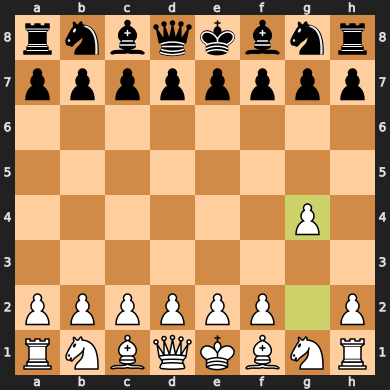

In [ ]:
board = chess.Board()
print(board.legal_moves)
moves = list(board.legal_moves)
random_move = random.choice(moves)
print(random_move)
board.push(random_move)
board

#### Chess Library

This portion of the notebook shows our learnign and understanding of the chess library we chose to use. It includes representations of the board and the use of generating possible moves

In [ ]:
board = chess.Board()
print(board.unicode())

♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜
♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙
♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖


In [ ]:
for move in board.legal_moves :
  print(board.uci(move))

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


In [ ]:
moves = list(board.legal_moves)
random_move = random.choice(moves)
print(random_move)
board.push(random_move)

b1a3


In [ ]:
print(board.unicode())

♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜
♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
♘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙
♖ ⭘ ♗ ♕ ♔ ♗ ♘ ♖


#### Bit Board

We looked into using bitboards for computer vision so our model could decypher different pieces from a single board. Bitboards are useful in our context since they represent the entire board in bits, making the representation extremely compact. This also allows very fast bitwise operations as opposed to iterating through higher-level data structures. Considering the overwhelming number of board states in chess, this was an easy decision. Bitboards ended up being used significantly in our Minichess algorithm.  
Bitboards are also a useful way to preprocess the data we are working with. The entire board is stored in one 64bit "word". This allows the model to do operations on the entire board quickly and efficiently. Since the whole board is stored in one word, this also helps handle board boundaries. If an illegal move is proposed, it will fail since it would "fall out" of the "word" representing the board. The density of the storage also allows cache performance to increase as the model is training for long periods of time.

In [ ]:
# Example code obtained from Kaggle

def print_bitboard(bitboard):

    # for each row
    for i in range(8):

        # print bitboard of 1s/0s (we have to mirror the bitboard)
        if i == 0:
            print(format(bitboard, "064b")[8*(i+1)-1::-1])
        else:
            print(format(bitboard, "064b")[8*(i+1)-1:8*i-1:-1])

# bitboard of pawns
print_bitboard(board.pawns)

00000000
11111111
00000000
00000000
00000000
00000000
11111111
00000000


In [ ]:
print_bitboard(board.kings)

00001000
00000000
00000000
00000000
00000000
00000000
00000000
00001000


## Mini chess code


Mini chess are variants of chess that use a smaller board and less pieces. For our project, we decided to focus on 5x3 Chess Variant, a smaller board with only Pawns, Rooks, and a King.

Below Code utilizes code from https://github.com/patrik-ha/explainable-minichess.git

In [ ]:
!git clone https://github.com/patrik-ha/explainable-minichess.git
%cd explainable-minichess

Cloning into 'explainable-minichess'...
remote: Enumerating objects: 560, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 560 (delta 121), reused 169 (delta 73), pack-reused 323 (from 1)
Receiving objects: 100% (560/560), 42.19 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (147/147), done.
/content/explainable-minichess


#### Custom 5x3 Board
Added a file to /content/explainable-minichess/minichess/boards



"5x3test.board"
```
rkr
ppp
...
PPP
RKR
```



#### Error fixed in explainable-minichess

On line 66 in explainable/chess/minichess/chess/fastchess.py

```
self.en_passant = np.array([-1, -1], dtype=np.uint8)
```

was change to this


```
self.en_passant = np.array([-1, -1], dtype=np.int8)
```




In [ ]:
import sys
sys.path.append('/content/explainable-minichess')

## Reinforcement Learning Comparison
In our project we made use of two models, a sparse Q reinforcement learning model and a deep Q neural network model. We originally used the python chess simulator for the deep Q neural network model, but this eventually proved to be to large, so we pivoted to the minichess simulator for our sparse Q model. For both simulators, we made use of bitboards (discussed above) for state representation. For action decisions we used an epsilon greedy policy for both models. Epsilon greedy is a idea where early in training, the model chooses random moves often, and learns from these random moves about whether they were good or bad. As training progresses the model makes random moves a lower percentage of the time and begins to make the move it knows to be best more often. By the end of training, the model selects the best-known moves with the highest consistency compared to any earlier point in training, which is expected as it has learned the most at this stage. However, the model still occasionally makes random moves to help it escape local optima. The only difference between the deep Q and sparse Q models in this regard is they use different processes to determine what move they know to be best.

Sparse Q creates an initially empty table of state-action pairs and rewards. As it encounters novel state-action pairs, and learns the calculated rewards, it adds the new state-action pair and reward to the table. It then calculates the rewards based on piece balance and win loss or draw in the step function of class MiniChessEnv below.

Deep Q neural networks calculate what move to be best based on their neural network which aims to approximate the Q function. The neural network approximates the Q function by predicting Q-values for each action using experience replay and updates using the belllman equation with stockfish informed rewards.




In [ ]:
import minichess
from minichess.rl.chess_helpers import get_initial_chess_object
class MiniChessEnv:
    def __init__(self, board_name="5x3test"):
        self.board_name = board_name
        self.board = get_initial_chess_object(board_name)

    def reset(self):
        self.board = get_initial_chess_object(self.board_name)
        return self.get_state_key()

    def get_state_key(self):
        b = self.board
        bitboard_state = tuple(
            b.bitboards[player, piece_type]
            for player in [0, 1]
            for piece_type in range(6)
        )
        return bitboard_state + (b.turn,)

    def get_legal_actions(self):
        legal_moves, _ = self.board.legal_moves()
        return bitboard_to_actions(legal_moves, self.board.dims)

    def material_balance(self):
        piece_values = [1, 5, 0]  # [P, R, K]

        white_score = sum(
            bin(self.board.bitboards[1, i]).count("1") * val
            for i, val in enumerate(piece_values)
        )
        black_score = sum(
            bin(self.board.bitboards[0, i]).count("1") * val
            for i, val in enumerate(piece_values)
        )
        if self.board.turn == 1:
            return white_score - black_score
        else:
            return black_score - white_score

    def step(self, action):
        from_index, to_index = action
        from_i, from_j = divmod(from_index, self.board.dims[1])
        to_i, to_j = divmod(to_index, self.board.dims[1])
        dx, dy = to_i - from_i, to_j - from_j

        self.board.make_move(from_i, from_j, dx, dy)

        result = self.board.game_result()

        if result == 1:
            base_reward = 100 if self.board.turn == 0 else -100
        elif result == -1:
            base_reward = -100 if self.board.turn == 0 else 100
        elif result == 0:
            base_reward = 0
        else:
            base_reward = 0

        material = self.material_balance()
        material_reward = 0.1 * material if result is None else 0

        total_reward = base_reward + material_reward
        done = result is not None

        return self.get_state_key(), total_reward, done

#### Baseline Model

Using the architecture made for the self-play RL Agent, we created a naive baseline agent that simply picks a random legal on each turn.

On average in this 5x3 game mode, the baseline agent has an 87.64% chance to draw. Furthermore, both colors have a fairly equal likelihood of winning, with only a 0.2 advantage in win percentage to white.

This shows that the expected outcome of this 5x3 game without some level skill is a draw. Therefore, we will be looking for an high increase in win percentage for both colors in our RL Agent using a Sparse Q Table.

In [ ]:
### Dummy Model

import random

white_wins = 0
black_wins = 0
draws = 0
dummy_performance_log = []
episodes = 5000

chessEnv = MiniChessEnv()

for episode in range(episodes):
    state_key = chessEnv.reset()
    done = False

    while not done:
        legal_actions = chessEnv.get_legal_actions()
        if not legal_actions:
            break

        action = random.choice(legal_actions)
        state_key, reward, done = chessEnv.step(action)

    result = chessEnv.board.game_result()
    if result == 1:
        white_wins += 1
    elif result == -1:
        black_wins += 1
    else:
        draws += 1

    if episode % 2500 == 0:
        total = white_wins + black_wins + draws
        print(f"\n--- Episode {episode} ---")
        print(f"White wins: {white_wins} ({100 * white_wins / total:.1f}%)")
        print(f"Black wins: {black_wins} ({100 * black_wins / total:.1f}%)")
        print(f"Draws     : {draws} ({100 * draws / total:.1f}%)\n")
        dummy_performance_log.append((episode, white_wins, black_wins, draws))

print("Random play simulation complete.")



--- Episode 0 ---
White wins: 1 (100.0%)
Black wins: 0 (0.0%)
Draws     : 0 (0.0%)


--- Episode 2500 ---
White wins: 158 (6.3%)
Black wins: 152 (6.1%)
Draws     : 2191 (87.6%)

Random play simulation complete.


In [ ]:
def percentage(part, total):
   return 100 * (part / total)

print(f"Dummy White Win Percetange: {percentage(dummy_performance_log[-1][1], 2500)}")
print(f"Dummy Black Win Percetange: {percentage(dummy_performance_log[-1][2], 2500)}")
print(f"Dummy Draw  Percetange: {percentage(dummy_performance_log[-1][3], 2500)}")

Dummy White Win Percetange: 6.32
Dummy Black Win Percetange: 6.08
Dummy Draw  Percetange: 87.64


In [ ]:
import random
from collections import defaultdict
from minichess.chess.fastchess_utils import true_bits, unflat

alpha = 0.1
gamma = 0.95
epsilon = 0.2
episodes = 500_000

# Sparse Q-table
Q = defaultdict(float)
chessEnv = MiniChessEnv()

def epsilon_greedy_action(state_key, legal_actions):
    if random.random() < epsilon:
        return random.choice(legal_actions)
    q_values = [Q[(state_key, a)] for a in legal_actions]
    max_q = max(q_values)
    best_actions = [a for a, q in zip(legal_actions, q_values) if q == max_q]
    return random.choice(best_actions)

def bitboard_to_actions(legal_moves, dims):
    actions = []
    for i in range(dims[0]):
        for j in range(dims[1]):
            from_index = i * dims[1] + j
            bitboard = legal_moves[i, j]
            for bit in true_bits(bitboard):
                to_i, to_j = unflat(bit, dims)
                to_index = to_i * dims[1] + to_j
                actions.append((from_index, to_index))
    return actions


In [ ]:
white_wins = 0
black_wins = 0
draws = 0

performance_log = []
for episode in range(episodes):
    state_key = chessEnv.reset()
    done = False

    while not done:
        legal_actions = chessEnv.get_legal_actions()
        if not legal_actions:
            break

        action = epsilon_greedy_action(state_key, legal_actions)
        next_state_key, reward, done = chessEnv.step(action)

        next_legal_actions = chessEnv.get_legal_actions()
        future_q = max([Q[(next_state_key, a)] for a in next_legal_actions], default=0.0)

        old_q = Q[(state_key, action)]
        Q[(state_key, action)] = old_q + alpha * (reward + gamma * future_q - old_q)

        state_key = next_state_key
    result = chessEnv.board.game_result()
    if result == 1:
        white_wins += 1
    elif result == -1:
        black_wins += 1
    elif result == 0:
        draws += 1

    if episode % 1000 == 0 and epsilon > 0.05:
        epsilon *= 0.999

    if episode % 5000 == 0:
        total = white_wins + black_wins + draws
        print(f"\n--- Episode {episode} ---")
        print(f"White wins: {white_wins} ({100 * white_wins / total:.1f}%)")
        print(f"Black wins: {black_wins} ({100 * black_wins / total:.1f}%)")
        print(f"Draws     : {draws} ({100 * draws / total:.1f}%)")
        print(f"Epsilon   : {epsilon:.3f}\n")
        performance_log.append((episode, white_wins, black_wins, draws))
        white_wins = black_wins = draws = 0

print("Training complete.")


--- Episode 0 ---
White wins: 0 (0.0%)
Black wins: 0 (0.0%)
Draws     : 1 (100.0%)
Epsilon   : 0.200


--- Episode 5000 ---
White wins: 1472 (29.4%)
Black wins: 233 (4.7%)
Draws     : 3295 (65.9%)
Epsilon   : 0.199


--- Episode 10000 ---
White wins: 2327 (46.5%)
Black wins: 223 (4.5%)
Draws     : 2450 (49.0%)
Epsilon   : 0.198


--- Episode 15000 ---
White wins: 2467 (49.3%)
Black wins: 532 (10.6%)
Draws     : 2001 (40.0%)
Epsilon   : 0.197


--- Episode 20000 ---
White wins: 2730 (54.6%)
Black wins: 616 (12.3%)
Draws     : 1654 (33.1%)
Epsilon   : 0.196


--- Episode 25000 ---
White wins: 2806 (56.1%)
Black wins: 747 (14.9%)
Draws     : 1447 (28.9%)
Epsilon   : 0.195


--- Episode 30000 ---
White wins: 2817 (56.3%)
Black wins: 804 (16.1%)
Draws     : 1379 (27.6%)
Epsilon   : 0.194


--- Episode 35000 ---
White wins: 3008 (60.2%)
Black wins: 850 (17.0%)
Draws     : 1142 (22.8%)
Epsilon   : 0.193


--- Episode 40000 ---
White wins: 3214 (64.3%)
Black wins: 857 (17.1%)
Draws     : 929 

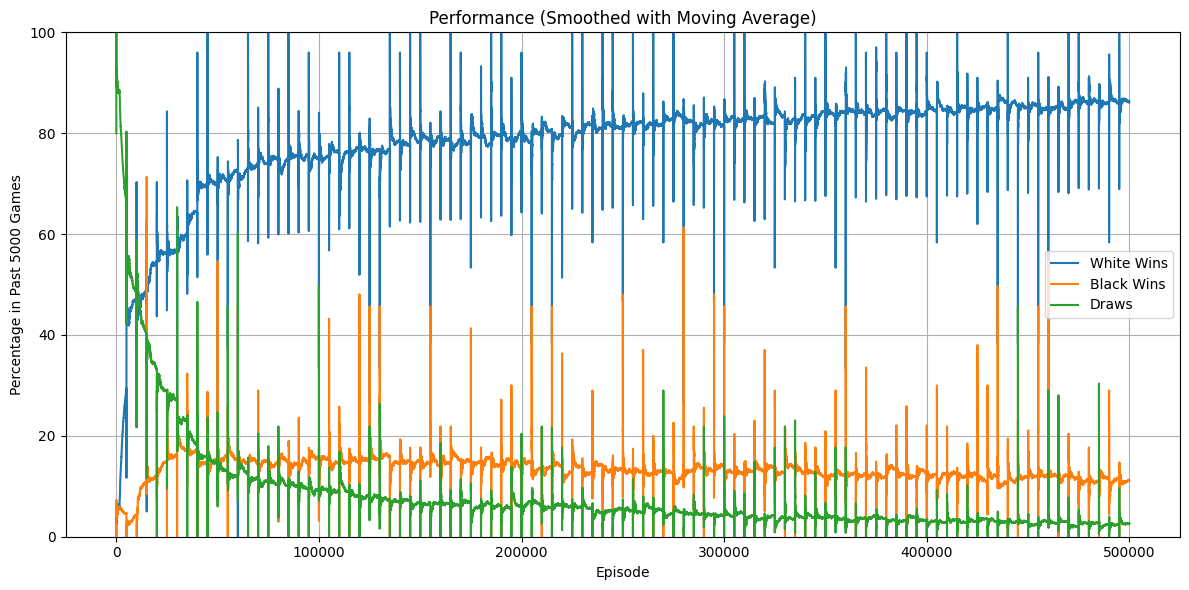

In [ ]:
white_percent = percentage(white_percents)
black_percent = percentage(black_percents)
draw_perenct = percentage(draw_percents)

plt.figure(figsize=(12, 6))
plt.plot(episodes, white_percent, label="White Wins", linestyle='-')
plt.plot(episodes, black_percent, label="Black Wins", linestyle='-')
plt.plot(episodes, draw_perenct, label="Draws", linestyle='-')

plt.xlabel("Episode")
plt.ylabel("Percentage in Past 5000 Games")
plt.title("Performance (Smoothed with Moving Average)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


####Analysis of Tuned Model against Baseline

As noted above, our baseline model makes random legal moves, and doing so manages to achieve a ~90% draw rate. In comparison, our tuned model has only a ~2% draw rate. This implies that the model "learned" how to end games instead of fruitlessly floundering around on an empty board. This is a success of our ability to build a chess engine, as our model is capable of a high level of play.

One may think that there are still issues with our model, given that white has a massive ~85% win percentage over black. This could imply that our model learned how to play as white, but not as black. However, this difference actually comes from the cramped board state and first move advantage. Because white gets the first move on such a small board, they control a lot of space, making it hard for black to do anything in response. In reality, there is not much that black can do to stop white from creating a devistating attack in the first few turns, leading to the distribution seen in our graph. The decrease in draws is much more indicative of our models success than the relative win-loss ratio of white and black.

#### Stockfish Engine Evaluation of Board

Stockfish is a strong, open source chess engine which determines advantage by centipawns. It provides custom analysis for mating positions. Chess.com and Lichess both use stockfish as an add-on alongside their chess product to allow their players to get real time feedback on the state of their games as well as in-depth replay analysis afterwards. Below is an example of using stockfish as well as a short exploration of its functionality when grading board positions. It is important to note that while Stockfish was our choice of a reward function for a full Deep Q model, Stockfish cannot be used for Minichess variants. We instead used a simple material calculation for our reward function, with a bonus for mates. This doesn't take into account the board possition, which is a much more abstract thing to measure and reward.

In [ ]:
import asyncio
asyncio.set_event_loop_policy(asyncio.WindowsProactorEventLoopPolicy())
#Attach from Drive   This used for development but not necessary for evaluation
#from google.colab import drive
#drive.mount('/content/drive')
# Create a stockfish engine instance
#stockfish = chess.engine.SimpleEngine.popen_uci(r"C:\Users\aguen\OneDrive\Documents\_cs445\Final\Project-20250512T234654Z-001\Project\stockfish-win\stockfish\stockfish-windows-x86-64-avx2.exe")
#stockfish = chess.engine.SimpleEngine.popen_uci("/content/stockfish/stockfish-ubuntu-x86-64-avx2")

# Analyse starting board with stockfish
board_score = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=20))\['score'].relative.score(mate_score=10000)

Mounted at /content/drive


In [ ]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . P .
. . . . . . . .
P P P P P P . P
R N B Q K B N R


The scores given by the analyze function are in units of "Centipawns", or 1/100th of a pawn.

In [ ]:
print(board_score)

133


In [ ]:
#Confirming Stockfish Accuracy
#Important to note that score is in terms of whos turn it is!!! If scores seem wrong, that may be why
testFENStrings = ["5K2/QP2P3/2R5/b7/2Pp2B1/B1k1P2p/4P1p1/7R w - - 0 1" #Mate in 3   Doesn't Seem to quite catch this because of depth limit
                  ,"rnbqkbnr/pppppppp/8/8/8/8/8/4K3 w kq - 0 1" #White only has a King
                  ,"8/8/8/4P3/1p1brk2/8/p1KPPn2/8 w - - 0 1" #Black Winning
                  ,"k7/8/5pr1/3p4/4q3/2p4b/1R3K1n/1R5b w - - 0 1" #White down much material, but Mate in 2
                  ]
for fen in testFENStrings:
  sfTestBoard = chess.Board(fen)
  print(sfTestBoard)
  testScore = stockfish.analyse(board=sfTestBoard, limit=chess.engine.Limit(depth=5))['score'].relative.score(mate_score=10000)
  print(testScore)
  print()

. . . . . K . .
Q P . . P . . .
. . R . . . . .
b . . . . . . .
. . P p . . B .
B . k . P . . p
. . . . P . p .
. . . . . . . R
1194

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . K . . .
-1460

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
. p . b r k . .
. . . . . . . .
p . K P P n . .
. . . . . . . .
-878

k . . . . . . .
. . . . . . . .
. . . . . p r .
. . . p . . . .
. . . . q . . .
. . p . . . . b
. R . . . K . n
. R . . . . . b
9998



## Deep Q Learning
Following this [guide](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)

Below is our attempt at an entire chess engine on a full 8x8 chess board. We made good progress on the model, but failed to fully realize an agent due to memory and time limitations. The code is preserved for prosperity.

We decided on a Deep Q-Learning approach, since it attempts to create a Q-value function. This function allows us to evaluate the available moves in a fixed amount of time, as opposed to Stockfish which runs many complicated computations dependent on the board state. Deep Q also generalizes well based on emergent patterns it finds as it is training. We decided to use sparse Q since the action space for chess is enormous. Sparse Q focuses learning on the most important or frequently encountered situations. It also has a heavy focus on exploration, which will help the model not to get stuck on any local optima.

In [ ]:
import numpy as np

def encode_valid_moves(board):

    valid_moves_dict = {}

    # for each valid move
    for move in board.legal_moves:

        # compute index based on starting square and target square
        index = 64 * (move.from_square) + (move.to_square)
        valid_moves_dict[index] = move

    return valid_moves_dict

valid_moves_dict = encode_valid_moves(board)
valid_moves_dict

{4015: Move.from_uci('g8h6'),
 4013: Move.from_uci('g8f6'),
 3690: Move.from_uci('b8c6'),
 3688: Move.from_uci('b8a6'),
 3567: Move.from_uci('h7h6'),
 3502: Move.from_uci('g7g6'),
 3437: Move.from_uci('f7f6'),
 3372: Move.from_uci('e7e6'),
 3307: Move.from_uci('d7d6'),
 3242: Move.from_uci('c7c6'),
 3177: Move.from_uci('b7b6'),
 3112: Move.from_uci('a7a6'),
 3559: Move.from_uci('h7h5'),
 3494: Move.from_uci('g7g5'),
 3429: Move.from_uci('f7f5'),
 3364: Move.from_uci('e7e5'),
 3299: Move.from_uci('d7d5'),
 3234: Move.from_uci('c7c5'),
 3169: Move.from_uci('b7b5'),
 3104: Move.from_uci('a7a5')}

In [ ]:
def mask_and_valid_moves(board):

    mask = np.zeros((64, 64))
    valid_moves_dict = {}

    # for each valid move
    for move in board.legal_moves:

        # mask is a matrix
        mask[move.from_square, move.to_square] = 1

        # compute index based on starting square and target square
        index = 64 * (move.from_square) + (move.to_square)

        valid_moves_dict[index] = move

    return mask, valid_moves_dict

mask, valid_moves_dict = mask_and_valid_moves(board)
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# This is our final mask layer
class MaskLayer(nn.Module):

    def __init__(self):
        super(MaskLayer, self).__init__()

    # mask is made of 0s/1s so it will just set to 0 any invalid move
    def forward(self, x, mask):
        return torch.mul(x, mask)

In [ ]:
class DQN(nn.Module):

    def __init__(self):

        super(DQN, self).__init__()

        # input size = 8 (rows) x 8 (cols) x 16 (bitboards)
        # - 6 bitboards for white pieces
        # - 6 bitboards for black pieces
        # - 1 for empty squares
        # - 1 for castling rights
        # - 1 for en passant
        # - 1 for player

        # first convolutional layer 8x8x16 => 8x8x32
        self.conv1 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # second convolutional layer 8x8x32 => 8x8x64
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # third convolutional layer 8x8x64 => 8x8x128
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # first fully connected layer 8192 => 8192
        self.fc1 = nn.Linear(128*64, 128*64)

        # second fully connected layer 8192 => 4096
        self.fc2 = nn.Linear(128*64, 64*64)

        # mask is made of 0s/1s so it will just set to 0 any invalid move 4096 => 4096
        self.mask = MaskLayer()

    def forward(self, x, mask=None, debug=False):

        # conv1 + bn1 with activation function ReLU
        x = nn.functional.relu(self.bn1(self.conv1(x)))

        # conv2 + bn2 with activation function ReLU
        x = nn.functional.relu(self.bn2(self.conv2(x)))

        # conv3 + bn3 with activation function ReLU
        x = nn.functional.relu(self.bn3(self.conv3(x)))

        # flatten will transform data structure from 3D 8x8x128 to 1D 8192
        x = nn.Flatten()(x)

        # fully connected with activation function ReLU
        x = nn.functional.relu(self.fc1(x))

        # fully connected WITHOUT ReLU (we want to keep negative values for our output layer)
        x = self.fc2(x)

        # if we have a mask we apply it to set to 0 all invalid moves
        if mask is not None:
            x = self.mask(x, mask)

        return x

In [ ]:
import chess
import chess.engine
import random

# for now our agent choose a random move
def agent_choose_move(board):
    return random.choice(list(board.legal_moves))

# Create a chess board
board = chess.Board()

# Create a stockfish engine instance
stockfish = chess.engine.SimpleEngine.popen_uci(r"C:\Users\aguen\OneDrive\Documents\_cs445\Final\Project-20250512T234654Z-001\Project\stockfish-win\stockfish\stockfish-windows-x86-64-avx2.exe")

# Analyse starting board with stockfish
board_score_before = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=5))\
    ['score'].relative.score(mate_score=10000)

# Agent choose move
move = agent_choose_move(board)
board.push(move)

# Make random move for black
board.push(random.choice(list(board.legal_moves)))

# Analyse final board with stockfish
board_score_after = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=5))\
    ['score'].relative.score(mate_score=10000)

# Divide by 100 to transform to centipawn to pawn score and subtract 0.01 to penalize the agent for each move.
# We want to win as fast as possible ;)
reward = board_score_after/100 - board_score_before/100 - 0.01

In [ ]:
print(board.unicode())

♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜
♟ ♟ ♟ ♟ ♟ ♟ ⭘ ♟
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ♟ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘
⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ♙
♙ ♙ ♙ ♙ ♙ ♙ ♙ ⭘
♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖


In [ ]:
move

Move.from_uci('h2h3')

In [ ]:
reward

1.0200000000000002

In [ ]:
# Exploration rate
epsilon = 1
epsilon_decay = 0.995
epsilon_min = 0.01

# choose random with probability epsilon
if random.uniform(0, 1) <= epsilon:
    move = random.choice(list(board.legal_moves))

# choose best move with probability 1 - epsilon
else:
    move = agent_choose_move(board)

# reduce exploration rate after each step
epsilon = max(epsilon * epsilon_decay, epsilon_min)
epsilon

0.995

In [ ]:
import os

class ChessAgent:

    # Constructor
    def __init__(self, input_model_path=None):

        # Exploration parameters
        self.epsilon = 1
        self.epsilon_decay = 0.99
        self.epsilon_min = 0.01

        # Training parameters
        self.gamma = 0.5 # tells the agent whether to prefer long term rewards or immediate rewards. 0 = greedy, 1 = long term
        self.learning_rate = 1e-03 # how fast the network updates its weights
        self.MEMORY_SIZE = 512 # how many steps/moves/samples to store. It is used for training (experience replay)
        self.MAX_PRIORITY = 1e+06 # max priority for a sample in memory. The higher the priority, the more likely the sample will be included in training
        self.memory = [] # memory data structure
        self.batch_size = 16 # how many sample to include in a training step

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(self.device)
        self.policy_net = DQN().to(self.device)

        # Load trained model if exists
        if input_model_path is not None and os.path.exists(input_model_path):
            self.policy_net.load_state_dict(torch.load(input_model_path, map_location=self.device))

        # We use mean squared error as our loss function
        self.loss_function = nn.MSELoss()

        # Adam optimizer provides adaptive learning rate and a momentum-based approach that can help the neural network
        # learn faster and converge more quickly towards the optimal set of parameters that minimize the cost or loss function
        self.optimizer = torch.optim.Adam(self.policy_net.parameters(), lr=self.learning_rate)


    # Convert board into a 3D np.array of 16 bitboards
    def convert_state(self, board):

        # dictionary to store bitboards
        piece_bitboards = {}

        # for each color (white, black)
        for color in chess.COLORS:

            # for each piece type (pawn, bishop, knigh, rook, queen, kinb)
            for piece_type in chess.PIECE_TYPES:
                v = board.pieces_mask(piece_type, color)
                symbol = chess.piece_symbol(piece_type)
                i = symbol.upper() if color else symbol
                piece_bitboards[i] = v

        # empty bitboard
        piece_bitboards['-'] = board.occupied ^ 2 ** 64 - 1

        # player bitboard (full 1s if player is white, full 0s otherwise)
        player = 2 ** 64 - 1 if board.turn else 0

        # castling_rights bitboard
        castling_rights = board.castling_rights

        # en passant bitboard
        en_passant = 0
        ep = board.ep_square
        if ep is not None:
            en_passant |= (1 << ep)

        # bitboards (16) = 12 for pieces, 1 for empty squares, 1 for player, 1 for castling rights, 1 for en passant
        bitboards = [b for b in piece_bitboards.values()] + [player] + [castling_rights] + [en_passant]

        # for each bitboard transform integet into a matrix of 1s and 0s
        # reshape in 3D format (16 x 8 x 8)
        bitarray = np.array([
            np.array([(bitboard >> i & 1) for i in range(64)])
            for bitboard in bitboards
        ]).reshape((16, 8, 8))

        return bitarray


    # get the move index out of the 4096 possible moves, as explained before
    def get_move_index(self, move):
        index = 64 * (move.from_square) + (move.to_square)
        return index


    # returns mask of valid moves (out of 4096) + the dictionary with the valid moves and their indexes
    def mask_and_valid_moves(self, board):

        mask = np.zeros((64, 64))
        valid_moves_dict = {}

        for move in board.legal_moves:
            mask[move.from_square, move.to_square] = 1
            valid_moves_dict[self.get_move_index(move)] = move

        # mask is flatten and returned as a PyTorch tensor
        # a tensor is just a vector optimized for derivatives computation, used in PyTorch neural nets
        return torch.from_numpy(mask.flatten()).to(self.device), valid_moves_dict


    # insert a step/move/sample into memory to be used in training as experience replay
    def remember(self, priority, state, action, reward, next_state, done, valid_moves, next_valid_moves):

        # if memory is full, we delete the least priority element
        if len(self.memory) >= self.MEMORY_SIZE:

            min_value = self.MAX_PRIORITY
            min_index = 0

            for i,n in enumerate(self.memory):

                # priority is stored in the first position of the tuple
                if n[0] < min_value:
                    min_value = n[0]
                    min_index = i

            del self.memory[min_index]

        self.memory.append((priority, state, action, reward, next_state, done, valid_moves, next_valid_moves))


    # Take a board as input and return a valid move defined as tuple (start square, end square)
    def select_action(self, board, best_move):

        # convert board into the 16 bitboards
        bit_state = self.convert_state(board)

        # get valid moves
        valid_moves_tensor, valid_move_dict = self.mask_and_valid_moves(board)

        # with probability epsilon = Explore
        if random.uniform(0, 1) <= self.epsilon:

            r = random.uniform(0, 1)

            # inside exploration with probability 10% choose best move (as computed by stockfish)
            if r <= 0.1:
                chosen_move = best_move

            # with probability 90% choose a random move
            else:
                chosen_move = random.choice(list(valid_move_dict.values()))

        # with probability 1 - epsilon = Exploit
        else:

            # during inference we don't need to compute gradients
            with torch.no_grad():

                # transform our 16 bitboards in a tensor of shape 1 x 16 x 8 x 8
                tensor = torch.from_numpy(bit_state).float().unsqueeze(0).to(self.device)
                valid_moves_tensor = valid_moves_tensor.to(self.device)

                # predict rewards for each valid move in the current state. valid_moves_tensor is the mask!
                policy_values = self.policy_net(tensor, valid_moves_tensor)

                # take the move index with the highest predicted reward
                chosen_move_index = int(policy_values.max(1)[1].view(1,1))

                # if move is valid:
                if chosen_move_index in valid_move_dict:
                    chosen_move = valid_move_dict[chosen_move_index]

                # if move is NOT valid, choose random move
                # this can happen if all valid moves have predicted values 0 or negative
                else:
                    chosen_move = random.choice(list(board.legal_moves))

        return self.get_move_index(chosen_move), chosen_move, bit_state, valid_moves_tensor


    # Decay epsilon (exploration rate)
    def adaptiveEGreedy(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)


    # Save trained model
    def save_model(self, path):
        torch.save(self.policy_net.state_dict(), path)

In [ ]:
# Train the model with Experience Replay
def learn_experience_replay(self, debug=False):

    batch_size = self.batch_size

    # if memory does not have enough sample to fill a batch, return
    if len(self.memory) < batch_size:
        return

    # get priorities from the first element in the memory samples tuple
    priorities = [x[0] for x in self.memory]

    # the higher the priority, the more probable the sample will be included in the batch training
    priorities_tot = np.sum(priorities)
    weights = priorities / priorities_tot

    # extract samples for the batch training
    minibatch_indexes = np.random.choice(range(len(self.memory)), size=batch_size, replace=False, p=weights)
    minibatch = [self.memory[x] for x in minibatch_indexes]

    # unpack the tuples in the batch into different lists, to be converted into tensors
    state_list = []
    state_valid_moves = []
    action_list = []
    reward_list = []
    next_state_list = []
    next_state_valid_moves = []
    done_list = []

    for priority, bit_state, action, reward, next_bit_state, done, state_valid_move, next_state_valid_move in minibatch:

        # bit state is the 16 bitboards of the state before the move
        state_list.append(bit_state)

        # state_valid_moves is a tensor containing the indexes of valid moves (out of 4096)
        state_valid_moves.append(state_valid_move.unsqueeze(0))

        # action is the index of the chosen move (out of 4096)
        action_list.append([action])

        # reward is the reward obtained by making the chosen move
        reward_list.append(reward)

        # done indicates if the game ended after making the chosen move
        done_list.append(done)

        if not done:

            # next_bit_state is the 16 bitboards of the state after the move
            next_state_list.append(next_bit_state)

            # next_state_valid_moves is a tensor containing the indexes of valid moves (out of 4096)
            next_state_valid_moves.append(next_state_valid_move.unsqueeze(0))

    # state_valid_moves and next_state_valid_moves are already tensors, we just need to concat them
    if not state_valid_moves or not state_list:
        return  # Nothing to train on

    state_valid_move_tensor = torch.cat(state_valid_moves, 0).to(self.device)
    state_tensor = torch.from_numpy(np.array(state_list)).float().to(self.device)

    if next_state_valid_moves and next_state_list:
        next_state_valid_move_tensor = torch.cat(next_state_valid_moves, 0).to(self.device)
        next_state_tensor = torch.from_numpy(np.array(next_state_list)).float().to(self.device)
    else:
        next_state_valid_move_tensor = torch.empty((0, 4096), dtype=torch.float32).to(self.device)
        next_state_tensor = torch.empty((0, 16, 8, 8), dtype=torch.float32).to(self.device)



    # convert all lists to tensors
    state_tensor = torch.from_numpy(np.array(state_list)).float().to(self.device)
    action_list_tensor = torch.from_numpy(np.array(action_list, dtype=np.int64)).to(self.device)
    reward_list_tensor = torch.from_numpy(np.array(reward_list)).float().to(self.device)
    next_state_tensor = torch.from_numpy(np.array(next_state_list)).float().to(self.device)

    # create a tensor with
    bool_array = np.array([not x for x in done_list])
    not_done_mask = torch.tensor(bool_array, dtype=torch.bool).to(self.device)

    # compute the expected rewards for each valid move
    policy_action_values = self.policy_net(state_tensor, state_valid_move_tensor)

    # get only the expected reward for the chosen move (to calculate loss against the actual reward)
    policy_action_values = policy_action_values.gather(1, action_list_tensor)

    # target values are what we want the network to predict (our actual values in the loss function)
    # target values = reward + max_reward_in_next_state * gamma
    # gamma is the discount factor and tells the agent whether to prefer long term rewards or immediate rewards. 0 = greedy, 1 = long term
    max_reward_in_next_state = torch.zeros(batch_size, dtype=torch.double).to(self.device)

    with torch.no_grad():

        # if the state is final (done = True, not_done_mask = False) the max_reward_in_next_state stays 0
        max_reward_in_next_state[not_done_mask] = self.policy_net(next_state_tensor, next_state_valid_move_tensor).max(1)[0]

    target_action_values = (max_reward_in_next_state * self.gamma) + reward_list_tensor
    target_action_values = target_action_values.unsqueeze(1)

    # loss is computed between expected values (predicted) and target values (actual)
    loss = self.loss_function(policy_action_values, target_action_values)

    # Update priorities of samples in memory based on size of error (higher error = higher priority)
    for i in range(batch_size):

        predicted_value = policy_action_values[i]
        target_value = target_action_values[i]

        # priority = mean squared error
        priority = F.mse_loss(predicted_value, target_value, reduction='mean').detach().cpu().numpy()

        # change priority of sample in memory
        sample = list(self.memory[minibatch_indexes[i]])
        sample[0] = priority
        self.memory[minibatch_indexes[i]] = tuple(sample)

    # clear gradients of all parameters from the previous training step
    self.optimizer.zero_grad()

    # calculate the new gradients of the loss with respect to all the model parameters by traversing the network backwards
    loss.backward()

    # adjust model parameters (weights, biases) according to computed gradients and learning rate
    self.optimizer.step()

    if debug:
        print("state_tensor shape", state_tensor.shape)
        print("\naction_list_tensor shape", action_list_tensor.shape)
        print("\naction_list_tensor (chosen move out of 4096)", action_list_tensor)
        print("\npolicy_action_values (expected reward of chosen move)", policy_action_values)
        print("\nnot_done_mask", not_done_mask)
        print("\ntarget_action_values", target_action_values)
        print("\nreward_list_tensor", reward_list_tensor)
        print("\nloss:", loss)

    # return loss so that we can plot loss by training step
    return float(loss)

# add this new method to our ChessAgent class
setattr(ChessAgent, "learn_experience_replay", learn_experience_replay)

In [ ]:
# generate a random training sample
def generate_random_sample(agent, stockfish, board):

    # set a standard priority
    priority = 1

    # convert board in 16 bitboards
    state = agent.convert_state(board)

    # get valid moves tensor
    valid_moves, _ = agent.mask_and_valid_moves(board)

    # choose random move and compute its index (out of 4096)
    random_move = random.choice(list(board.legal_moves))
    action = agent.get_move_index(random_move)

    # make random move for white and black and compute reward
    board_score_before = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=5))\
        ['score'].relative.score(mate_score=10000)

    board.push(random_move)
    board.push(random.choice(list(board.legal_moves)))

    board_score_after = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=5))\
        ['score'].relative.score(mate_score=10000)

    # divide by 100 to convert from centipawns to pawns score
    reward = board_score_after / 100 - board_score_before / 100 - 0.01

    # convert board in 16 bitboard
    next_state = agent.convert_state(board)

    # if board.result() == * the game is not finished
    done = board.result() != '*'

    # get valid moves tensor
    next_valid_moves, _ = agent.mask_and_valid_moves(board)

    # undo white and black moves
    board.pop()
    board.pop()

    # store in agent memory
    agent.remember(priority, state, action, reward, next_state, done, valid_moves, next_valid_moves)

In [ ]:
# Create a chess board
board = chess.Board()

# Create an agent
agent = ChessAgent()

for i in range(16):
    generate_random_sample(agent, stockfish, board)

len(agent.memory)

cuda


16

In [ ]:
agent.learn_experience_replay(debug=True)

state_tensor shape torch.Size([16, 16, 8, 8])

action_list_tensor shape torch.Size([16, 1])

action_list_tensor (chosen move out of 4096) tensor([[666],
        [528],
        [926],
        [658],
        [601],
        [593],
        [666],
        [796],
        [666],
        [731],
        [731],
        [861],
        [ 82],
        [861],
        [796],
        [536]], device='cuda:0')

policy_action_values (expected reward of chosen move) tensor([[ 0.0383],
        [-0.0652],
        [ 0.0812],
        [ 0.0485],
        [-0.1678],
        [ 0.0927],
        [ 0.0383],
        [-0.0208],
        [ 0.0383],
        [ 0.1235],
        [ 0.1235],
        [ 0.1198],
        [-0.0620],
        [ 0.1198],
        [-0.0208],
        [ 0.0395]], device='cuda:0', dtype=torch.float64,
       grad_fn=<GatherBackward0>)

not_done_mask tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

target_action_values tenso

0.342616161746051

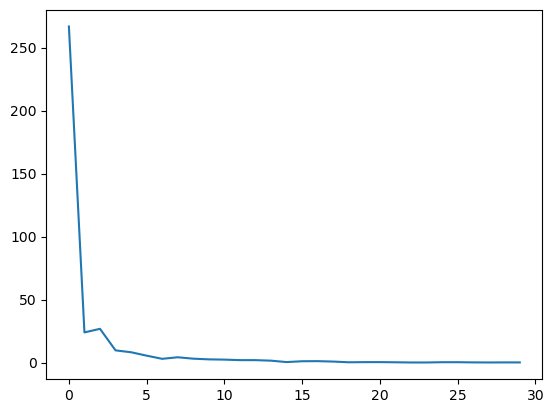

In [ ]:
import matplotlib.pyplot as plt

loss = []
for i in range(30):
    loss.append(agent.learn_experience_replay(debug=False))

plt.plot(loss)
plt.show()

In [ ]:
import time
import pandas as pd

def Q_learning(agent, stockfish, games_to_play, max_game_moves, board_config=None):

    loss = []
    final_score = []
    games = 0
    steps = 0
    start_time = time.time()

    # we play n games
    while games < games_to_play:

        games += 1

        # Create a new standard board
        if board_config is None:
            board = chess.Board()

        # Create a board with the desired configuration (pieces and starting positions)
        else:
            board = chess.Board(board_config)

        done = False
        game_moves = 0

        # analyse board with stockfish
        analysis = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=5))

        # get best possible move according to stockfish (with depth=5)
        best_move = analysis['pv'][0]

        # until game is not finished
        while not done:

            game_moves += 1
            steps += 1

            # choose action, here the agent choose whether to explore or exploit
            action_index, move, bit_state, valid_move_tensor = agent.select_action(board, best_move)

            # save this score to compute the reward after the opponent move
            board_score_before = analysis['score'].relative.score(mate_score=10000) / 100

            # white moves
            board.push(move)

            # the game is finished (checkmate, stalemate, draw conditions, ...) or we reached max moves
            done = board.result() != '*' or game_moves > max_game_moves

            if done:

                final_result = board.result()

                # if the game is still not finished (meaning we reached max moves without ending the game) or draw
                # we assign a negative reward
                if final_result == '*' or final_result == "1/2-1/2":
                    reward = -10

                # if white wins
                elif final_result == "1-0":
                    reward = 1000

                # if black wins
                else:
                    reward = -1000

                # store sample in memory
                agent.remember(agent.MAX_PRIORITY, bit_state, action_index, reward, None, done, valid_move_tensor, None)

                board_score_after = reward

            # game not finished
            else:

                # black moves
                board.push(random.choice(list(board.legal_moves)))

                # board score is back to our perspective after black moves, so no need to change signs
                analysis = stockfish.analyse(board=board, limit=chess.engine.Limit(depth=5))
                board_score_after = analysis['score'].relative.score(mate_score=10000) / 100

                # is game finished?
                done = board.result() != '*'

                # if not done, update next best move
                if not done:
                    best_move = analysis['pv'][0]

                next_bit_state = agent.convert_state(board)
                next_valid_move_tensor, _ = agent.mask_and_valid_moves(board)

                # divide by 100 to convert from centipawns to pawns score
                reward = board_score_after - board_score_before - 0.01

                # store sample in memory
                agent.remember(agent.MAX_PRIORITY, bit_state, action_index, reward, next_bit_state, done, valid_move_tensor, next_valid_move_tensor)


            # train model and store loss
            loss.append(agent.learn_experience_replay(debug=False))

            # adjust epsilon (exploration rate)
            agent.adaptiveEGreedy()

        # save final game score
        final_score.append(board_score_after)

    # plot training results
    score_df = pd.DataFrame(final_score, columns=["score"])
    score_df['ma'] = score_df["score"].rolling(window = games // 5).mean()
    loss_df = pd.DataFrame(loss, columns=["loss"])
    loss_df['ma'] = loss_df["loss"].rolling(window=steps // 5).mean()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Plot the score chart in the first subplot
    ax1.plot(score_df.index, score_df["score"], linewidth=0.2)
    ax1.plot(score_df.index, score_df["ma"])
    ax1.set_title('Final score by game')

    # Plot the loss chart in the second subplot
    ax2.plot(loss_df.index, loss_df["loss"], linewidth=0.1)
    ax2.plot(loss_df.index, loss_df["ma"])
    ax2.set_title('Loss by training step')

    # Show the plot
    plt.show()

In [ ]:
board = chess.Board()

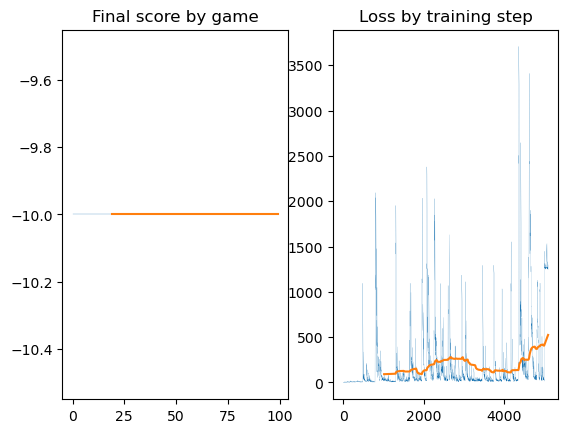

In [ ]:
Q_learning(agent, stockfish, games_to_play=100, max_game_moves=50)

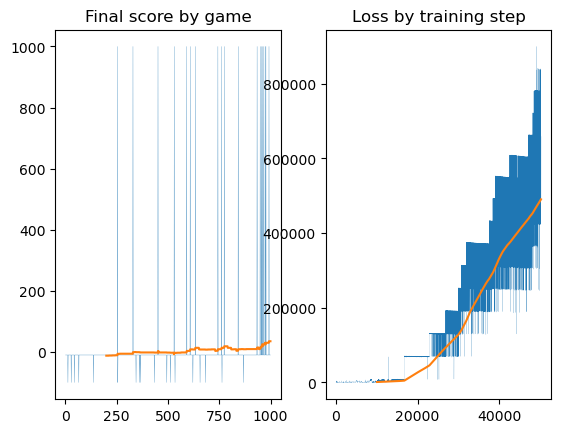

In [ ]:
Q_learning(agent, stockfish, games_to_play=1000, max_game_moves=50)

In [ ]:
Q_learning(agent, stockfish, games_to_play=10000, max_game_moves=50)
#should run for ~260 minutes (4.3 hours)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [0]

## Full Chess Board Results  
1000 games takes about 25 minutes on the strongest hardware we had available in the group, so 10,000 would take 4 hours. Attempting to run this kept leading to varying errors until we settled on the one above. This appears to be derived from a hardware limitation, a lack of memory and a slow gpu, so we realized we would not be able to run the full game example as much as we would have liked. After this, we decided to pivot to the minichess environment above, to avoid hitting the hardware limitation. Minichess exists on a much smaller board, and therefore a much smaller state-space that can be more easily represented by a Deep Q model without running out of memory

## 5x3 Chess Results
For our 5x3 chess board, we ended up training for 500000 games. Near the begining, draws dominated the overall win-loss percentage. This represents the fact that our model didn't know how to play the game, flailing around like the headless chicken. As time progressed, the number of draws went down signifigantly, ending around 2% total. This shows the growth of our agent, learning the play and play well. The winrates are very skewed in favor of white, but this is does not mean the the model was bad at playing black. In 5x3 chess, there is a massive advantage to going first, which in chess is always white. The fact that black and white win rates started off similar and the disparity slowly grew shows that the model got very good at pressing its advantage as white, and because there are very few defensive options on a board this constricted, there aren't any good responses from black. Overall, our model learned to play the game fairly well by itself. It did not reach a level of perfect play, but it plays well enough to end games decisively, showing an understanding of attacking and advantages.


# References  
[Example of RL using python chess library](https://www.kaggle.com/code/mandmdatascience/chess-engine-2-reinforcement-learning)  
Non-Linear Function Approximation (ie: [Deep-Q](https://www.geeksforgeeks.org/deep-q-learning/) or [Actor-Critic](https://www.geeksforgeeks.org/actor-critic-algorithm-in-reinforcement-learning/))  
[Radial Base Function](https://www.geeksforgeeks.org/radial-basis-function-kernel-machine-learning/) or Tile Encoding